<a href="https://colab.research.google.com/github/Julian981012/Segundo-Proyecto/blob/main/Proyecto2final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>
Bioseñales y Sistemas </center></font></h1>
<h2><font color='0B5345'> <center>
Segundo Proyecto Semestral  </center></font></h2>
<h4><font color='0B5345'>
<center></center>
<center>Julian Olaya-Melissa Cadavid</center>
</font></h4>

<font  face="Courier New" size="3">
<p1><center> </center></p1>



<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>


In [ ]:
import numpy as np
import pandas as pd
import os
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, mannwhitneyu
from scipy import stats
import warnings

warnings.filterwarnings("ignore", message="invalid value encountered in .*")

In [ ]:
drive.mount('/content/drive')

carpeta_drive = "/content/drive/MyDrive/EMG_Propios_Seguimiento2"

carpetas = [f"{i:02d}" for i in range(1, 11)]

dataframes_por_carpeta = []

for carpeta in carpetas:

    ruta_carpeta = os.path.join(carpeta_drive, carpeta)
    archivos_txt = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith(".txt")]

    if archivos_txt:

        ruta_archivo = os.path.join(ruta_carpeta, archivos_txt[0])
        df = pd.read_csv(ruta_archivo, header=None, names=[carpeta])
        dataframes_por_carpeta.append(df)

df_final = pd.concat(dataframes_por_carpeta, axis=1)

display(df_final)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,01,02,03,04,05,06,07,08,09,10
0,503.0,508.0,504.0,505.0,509.0,506.0,507.0,503.0,518.0,511.0
1,492.0,507.0,506.0,515.0,499.0,505.0,507.0,526.0,509.0,504.0
2,510.0,507.0,506.0,503.0,511.0,508.0,508.0,533.0,506.0,506.0
3,499.0,510.0,508.0,507.0,504.0,510.0,507.0,495.0,505.0,503.0
4,504.0,509.0,507.0,514.0,501.0,504.0,507.0,538.0,506.0,507.0
...,...,...,...,...,...,...,...,...,...,...
4995,504.0,515.0,516.0,519.0,510.0,505.0,535.0,549.0,497.0,509.0
4996,512.0,511.0,523.0,515.0,510.0,513.0,536.0,557.0,506.0,508.0
4997,506.0,510.0,522.0,528.0,510.0,524.0,492.0,536.0,535.0,508.0
4998,514.0,509.0,528.0,529.0,509.0,510.0,520.0,521.0,555.0,509.0


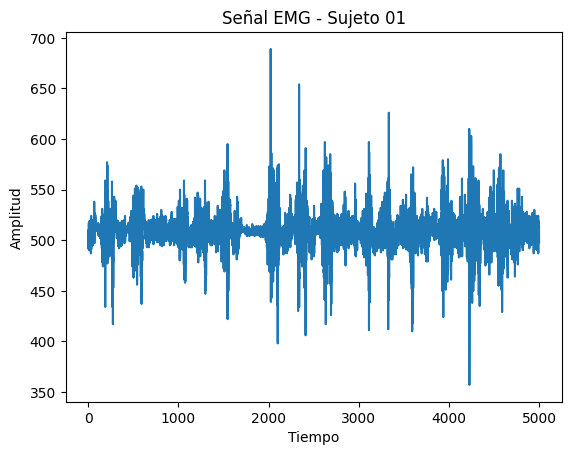

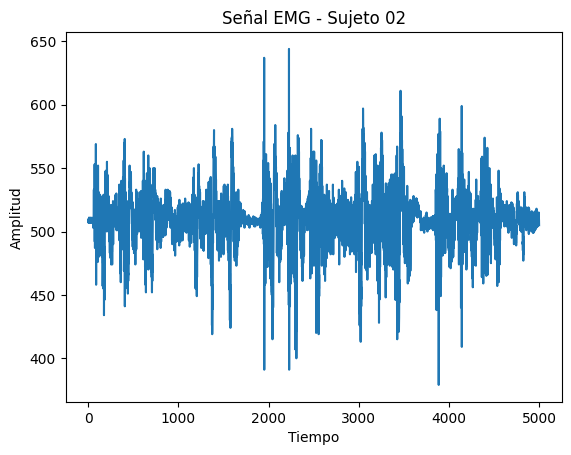

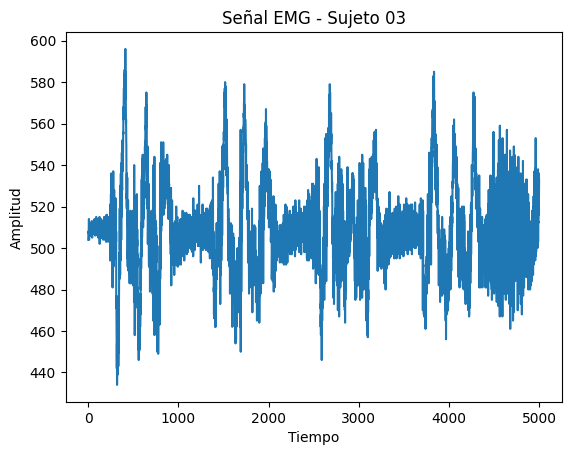

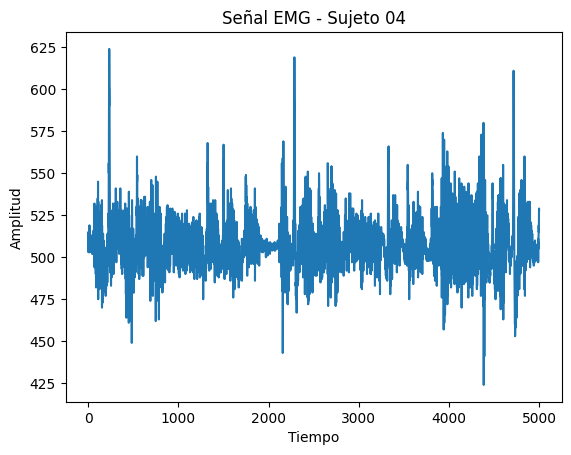

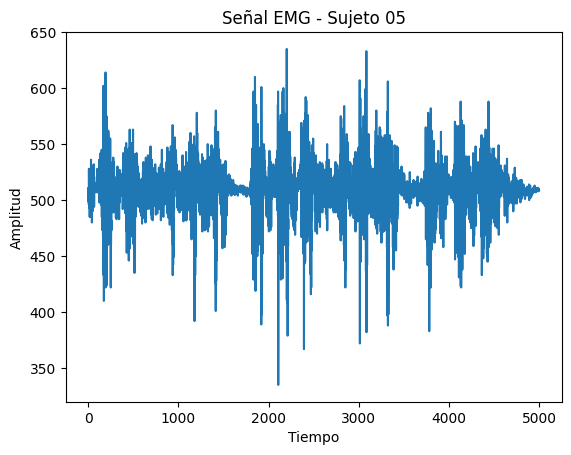

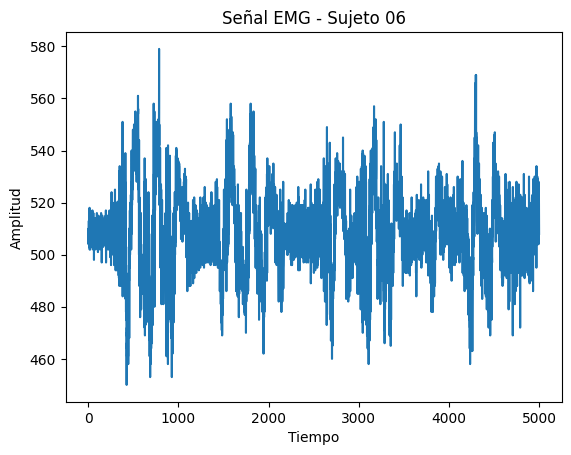

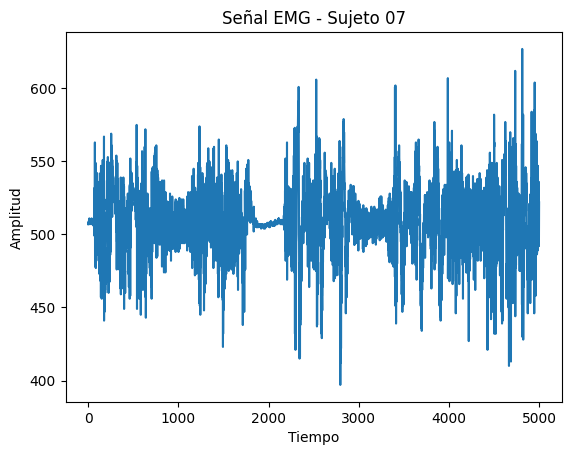

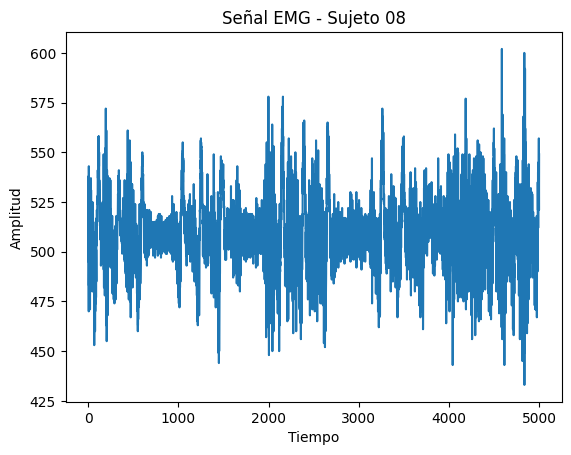

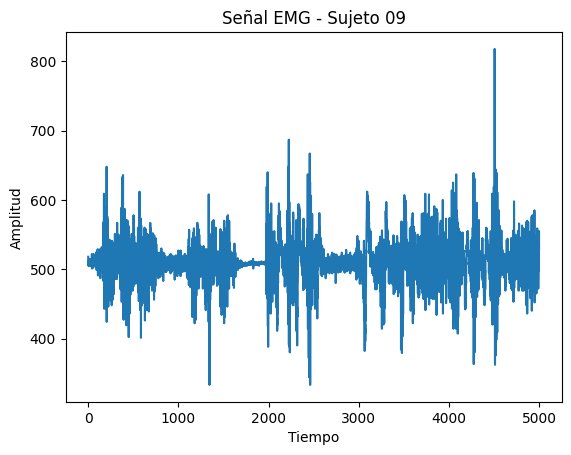

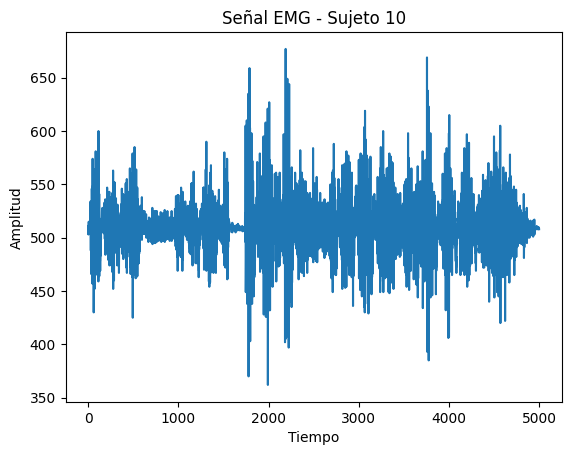

In [ ]:
carpetas = [f"{i:02d}" for i in range(1, 11)]

for carpeta in carpetas:
    ruta_carpeta = os.path.join(carpeta_drive, carpeta)

    archivos_txt = [archivo for archivo in os.listdir(ruta_carpeta) if archivo.endswith(".txt")]

    if archivos_txt:
        ruta_archivo = os.path.join(ruta_carpeta, archivos_txt[0])
        df = pd.read_csv(ruta_archivo, header=None, names=[carpeta])

        plt.plot(df.index, df[carpeta])
        plt.xlabel('Tiempo')
        plt.ylabel('Amplitud')
        plt.title(f'Señal EMG - Sujeto {carpeta}')

        plt.show()

In [ ]:
def calcular_tkeo(signal):
    tkeo_signal = np.zeros_like(signal)
    for i in range(len(signal)):
        if i == 0:
            tkeo_signal[i] = signal[i] * signal[i+1]
        elif i == len(signal) - 1:
            tkeo_signal[i] = signal[i] * signal[i-1]
        else:
            tkeo_signal[i] = signal[i] ** 2 - signal[i-1] * signal[i+1]
#    tkeo_signal *= escala
    return tkeo_signal

df_tkeo = df_final.copy()
for columna in df_tkeo.columns:
    df_tkeo[columna] = calcular_tkeo(df_tkeo[columna])

display(df_tkeo)

,01,02,03,04,05,06,07,08,09,10
0,247476.0,257556.0,255024.0,260075.0,253991.0,255530.0,257049.0,264578.0,263662.0,257544.0
1,-14466.0,-507.0,1012.0,11210.0,-11098.0,-2023.0,-507.0,8577.0,-3027.0,-4550.0
2,14592.0,-1521.0,-1012.0,-8096.0,9625.0,514.0,1015.0,23719.0,-1009.0,2524.0
3,-8039.0,2037.0,1522.0,-1493.0,-1995.0,4068.0,-507.0,-41729.0,-1011.0,-3533.0
4,1522.0,-509.0,-507.0,7147.0,-5535.0,-5064.0,-1014.0,37489.0,-504.0,1525.0
...,...,...,...,...,...,...,...,...,...,...
4995,-7104.0,3082.0,-14072.0,2076.0,510.0,-4040.0,21441.0,-1050.0,-18135.0,509.0
4996,7120.0,-1529.0,4177.0,-8807.0,0.0,-1451.0,24076.0,15985.0,-9859.0,-508.0
4997,-7132.0,1.0,-3660.0,6349.0,510.0,12946.0,-36656.0,-2901.0,5395.0,-508.0
4998,12208.0,1531.0,558.0,1057.0,-509.0,-6092.0,13576.0,-22823.0,25010.0,1017.0


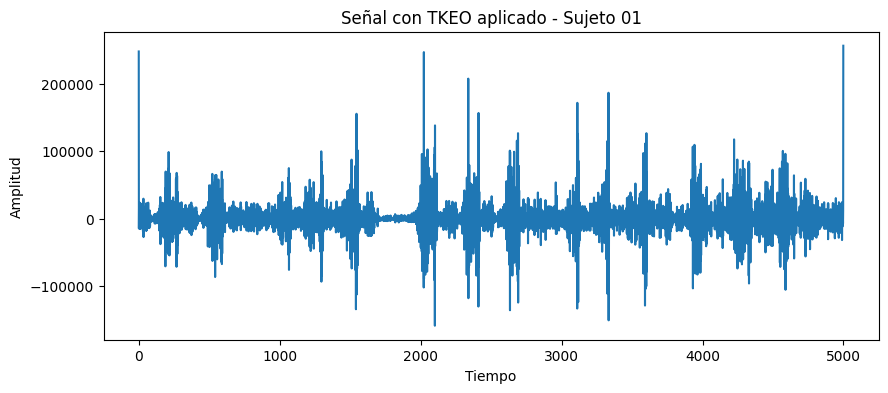

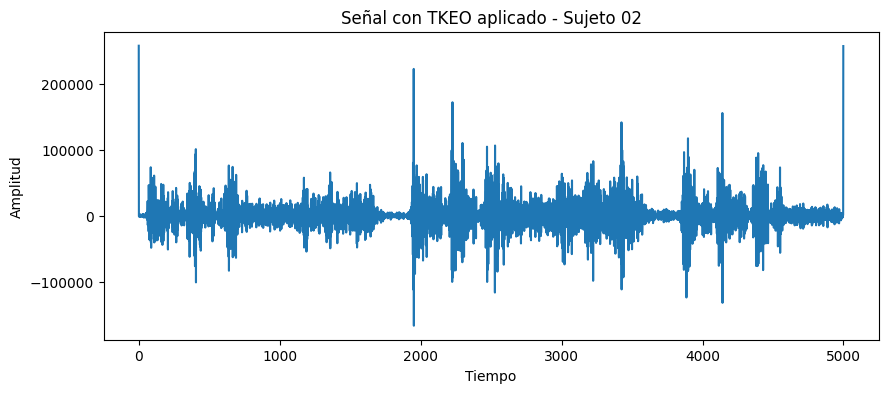

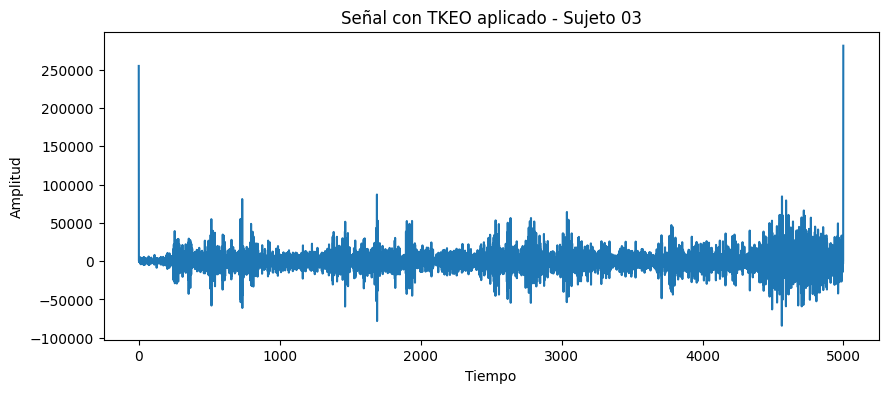

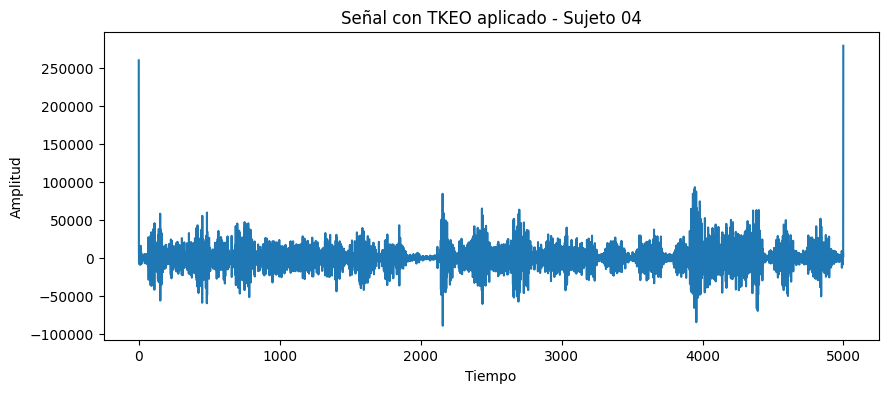

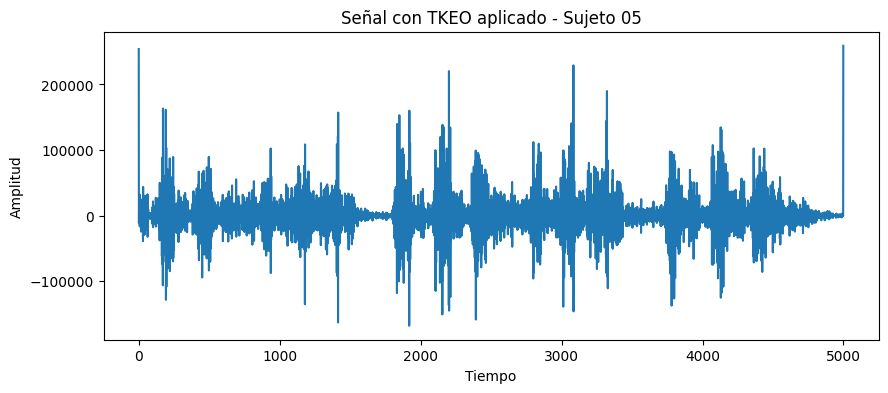

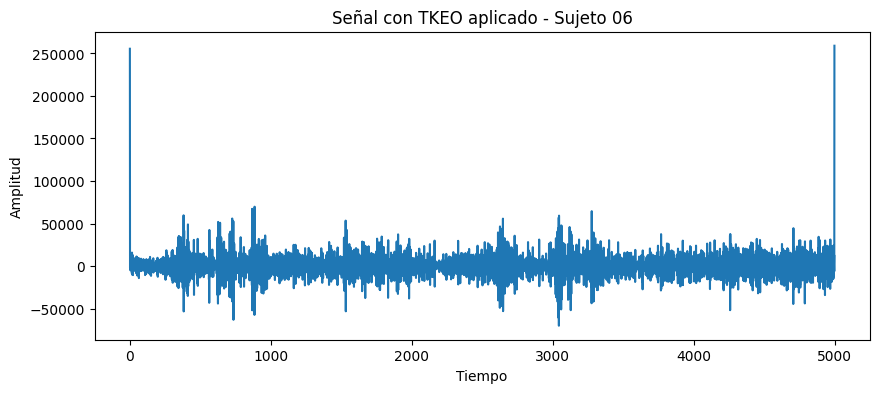

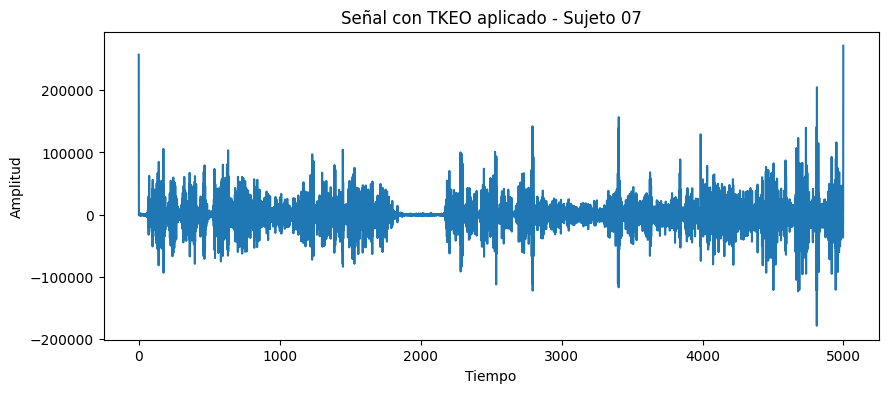

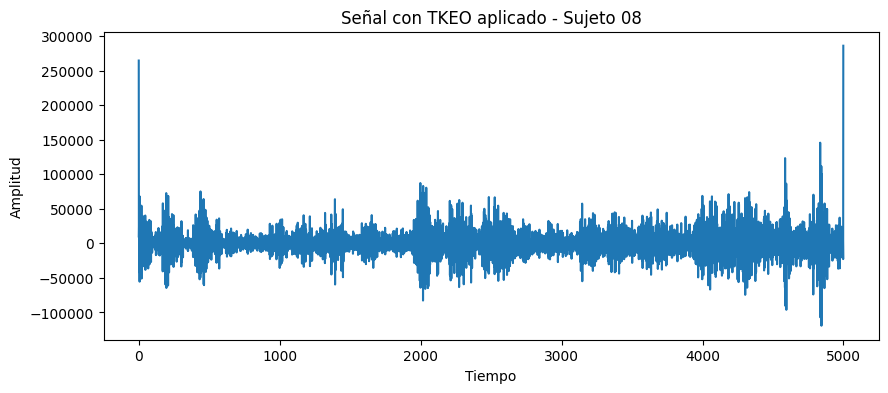

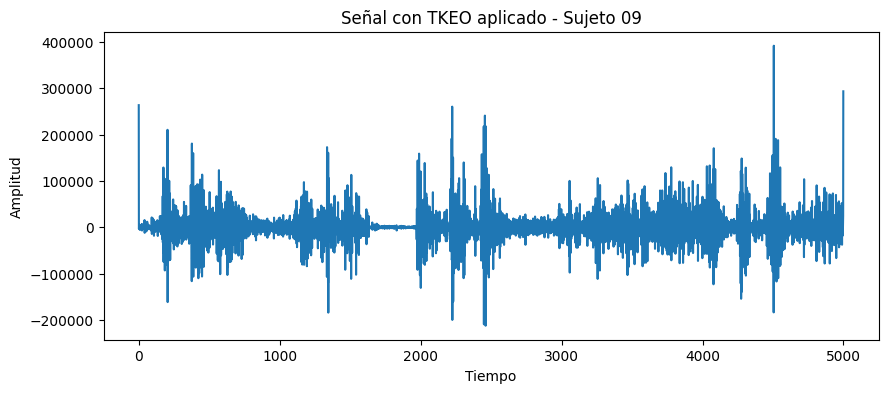

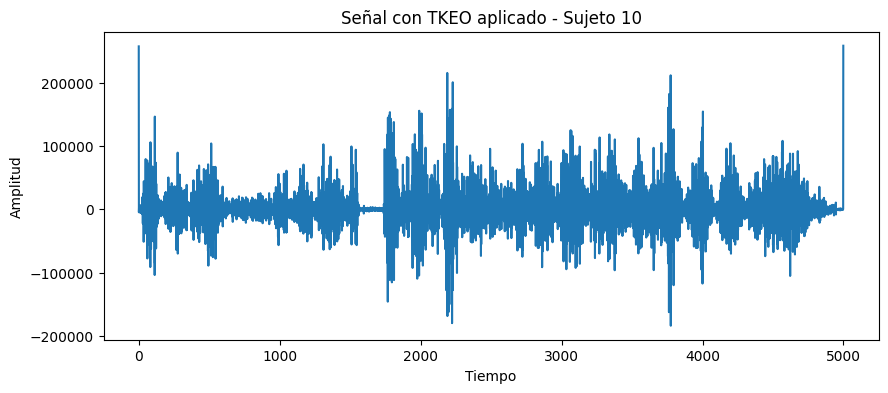

In [ ]:
for columna in df_tkeo.columns:
    signal_tkeo = df_tkeo[columna]

    plt.figure(figsize=(10, 4))
    plt.plot(signal_tkeo)
    plt.title(f"Señal con TKEO aplicado - Sujeto {columna}")
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.show()

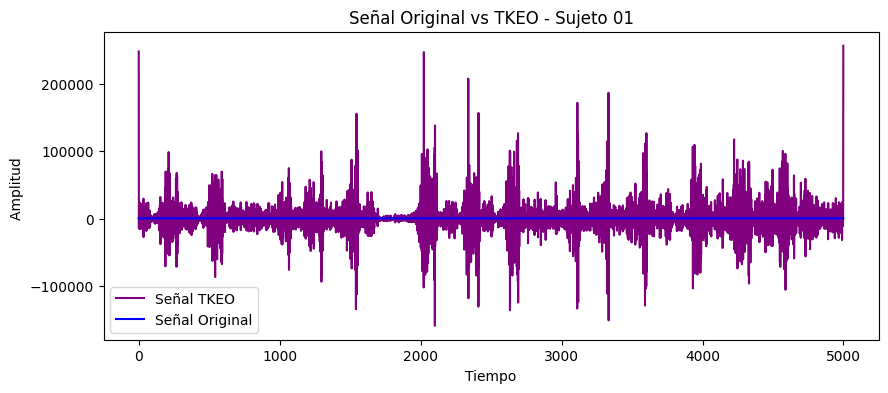

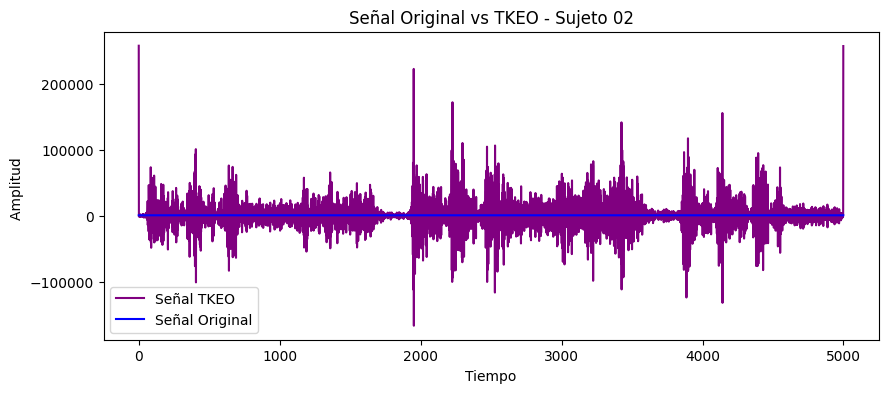

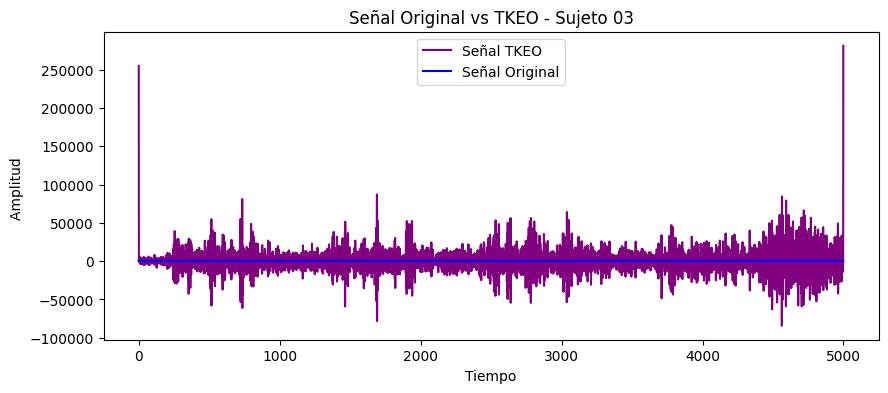

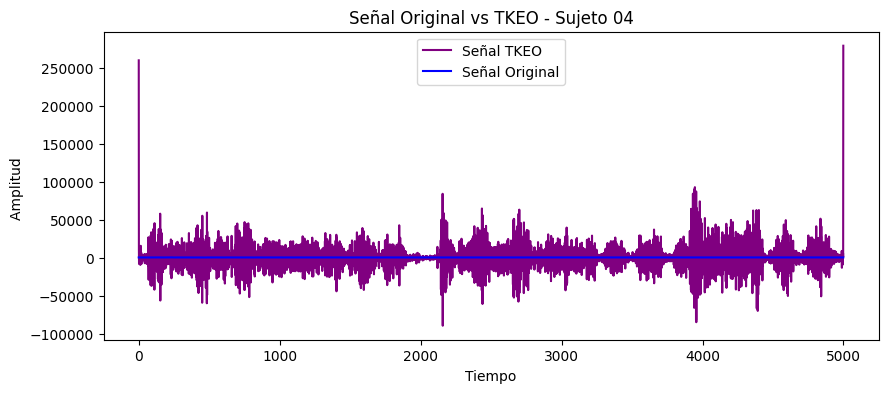

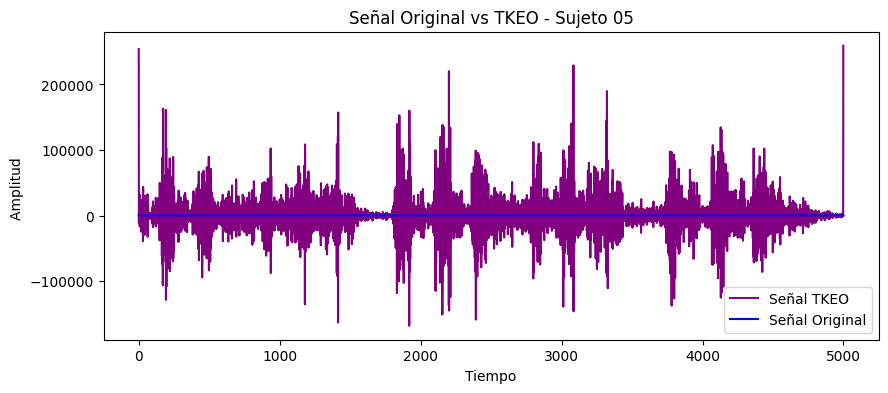

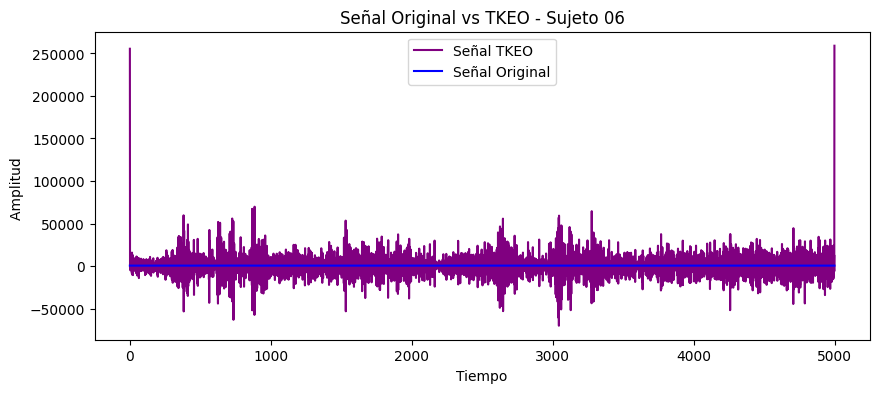

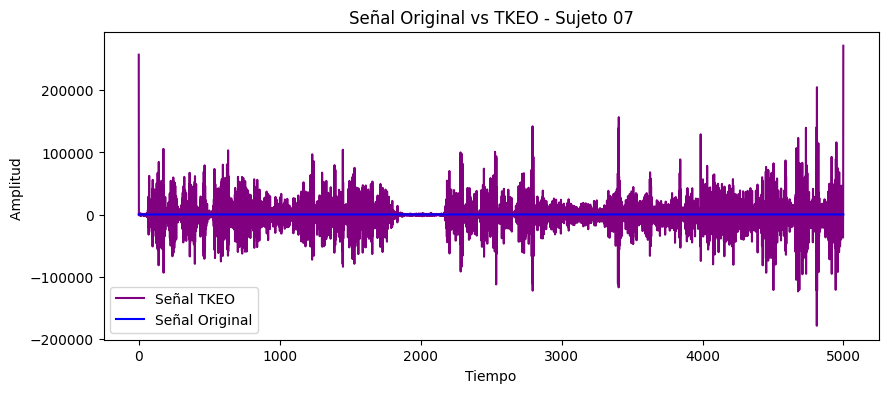

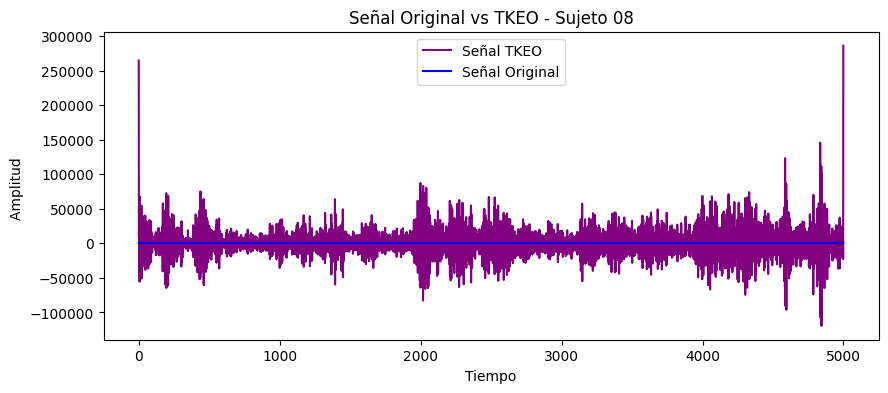

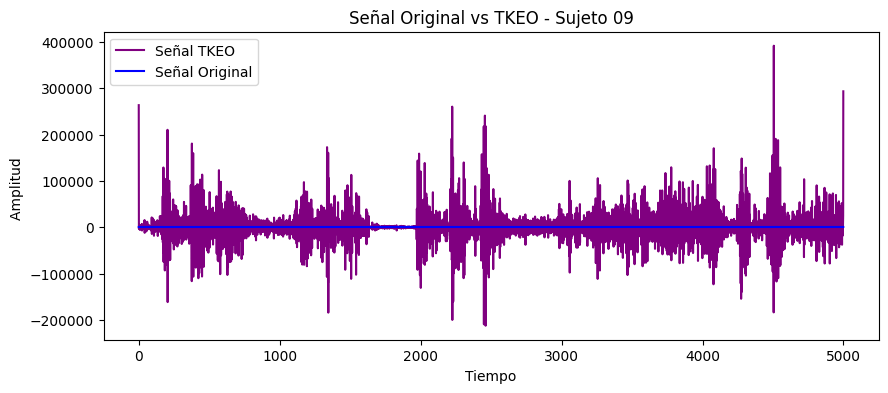

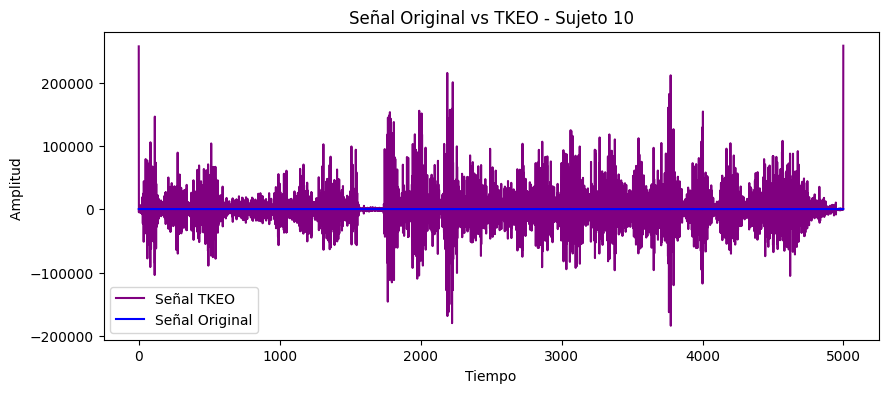

In [ ]:
for columna in df_final.columns:
    signal_original = df_final[columna ]
    signal_tkeo = df_tkeo[columna ]

    plt.figure(figsize=(10, 4))


    plt.plot(signal_tkeo, label='Señal TKEO ', color='purple')
    plt.plot(signal_original, label='Señal Original', color='blue')
    plt.legend()
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud ")
    plt.title(f"Señal Original vs TKEO - Sujeto {columna}")
    plt.show()

In [ ]:
def rms(signal):
    return np.sqrt(np.mean(np.square(signal)))

def variance(signal):
    return np.var(signal)

def mav(signal):
    return np.mean(np.abs(signal))

def mavs(signal):
    return np.mean(np.abs(np.diff(signal)))

def ssc(signal):
    return np.sum(np.abs(np.diff(np.sign(np.diff(signal)))))

def wl(signal):
    return np.sum(np.abs(np.diff(signal)))

def zc(signal):
    return np.sum(np.abs(np.diff(np.sign(signal)))) / 2



In [ ]:
results = {
    "RMS": df_final.apply(rms),
    "Variance": df_final.apply(variance),
    "MAV": df_final.apply(mav),
    "MAVS": df_final.apply(mavs),
    "SSC": df_final.apply(ssc),
    "WL": df_final.apply(wl),
    "ZC": df_final.apply(zc)
}


df_results_original = pd.DataFrame(results)

display(df_results_original)

,RMS,Variance,MAV,MAVS,SSC,WL,ZC
01,508.850199,336.952039,508.5190,16.755151,6550.0,83759.0,0.0
02,508.999757,465.786636,508.5420,16.431886,6564.0,82143.0,0.0
03,508.855790,436.200671,508.4270,11.469294,6834.0,57335.0,0.0
04,508.678203,234.958812,508.4472,12.122224,6390.0,60599.0,0.0
05,509.009022,507.967904,508.5098,20.929786,6699.0,104628.0,0.0
06,508.620413,238.602958,508.3858,9.935587,6764.0,49668.0,0.0
07,508.962816,496.118585,508.4752,18.882777,7021.0,94395.0,0.0
08,508.715175,319.755759,508.4008,15.601920,7082.0,77994.0,0.0
09,509.372995,922.360898,508.4668,23.720944,6150.0,118581.0,0.0
10,509.019063,590.392655,508.4388,24.082617,6394.0,120389.0,0.0


In [ ]:
results = {
    "RMS": df_tkeo.apply(rms),
    "Variance": df_tkeo.apply(variance),
    "MAV": df_tkeo.apply(mav),
    "MAVS": df_tkeo.apply(mavs),
    "SSC": df_tkeo.apply(ssc),
    "WL": df_tkeo.apply(wl),
    "ZC": df_tkeo.apply(zc)
}

df_results_tkeo = pd.DataFrame(results)

display(df_results_tkeo)

,RMS,Variance,MAV,MAVS,SSC,WL,ZC
01,24814.921693,6.155866e+08,14954.3628,27145.485497,7526.0,135700282.0,3583.0
02,22829.606751,5.210223e+08,14552.9776,26272.341868,7590.0,131335437.0,3647.0
03,15540.080446,2.414468e+08,10415.0360,19051.527906,7720.0,95238588.0,3719.0
04,16027.773200,2.568167e+08,10638.9860,19118.363473,7514.0,95572699.0,3561.0
05,29241.403248,8.546707e+08,18541.1992,33600.297259,7600.0,167967886.0,3637.0
06,13316.583884,1.772971e+08,8976.1418,16435.886377,7700.0,82162996.0,3665.0
07,26028.804802,6.773487e+08,17375.3560,32431.243249,7920.0,162123785.0,3810.0
08,20233.229385,4.092912e+08,14139.1664,26128.830366,7866.0,130618023.0,3798.0
09,33569.990687,1.126040e+09,20348.5082,36533.367273,7498.0,182630303.0,3518.0
10,31579.431529,9.966174e+08,20960.6638,37880.238448,7494.0,189363312.0,3573.0


Para este proyecto se busca analizar el comportamiento del músculo biceps en los diferentes movimientos del protocolo expuesto, para 10 diferentes sujetos entre los cuales son 4 hombres y 6 mujeres, en las edades entre 20 y 60 años.

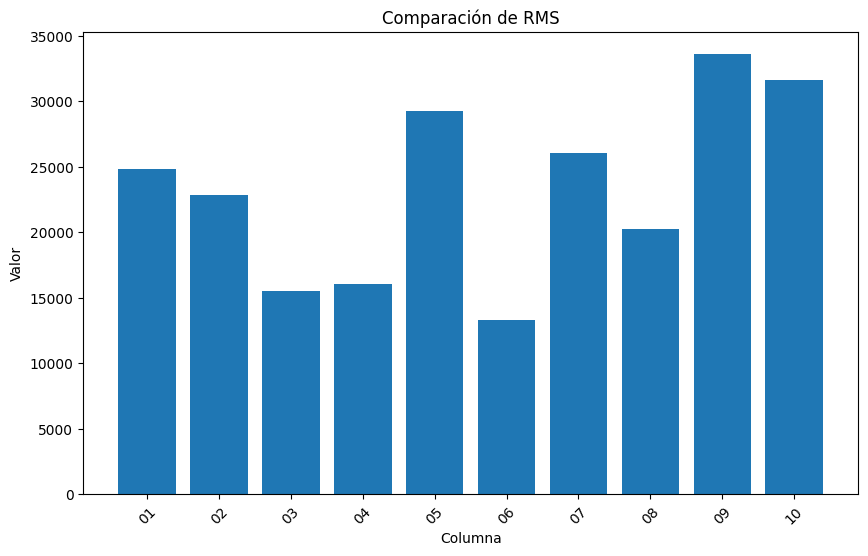

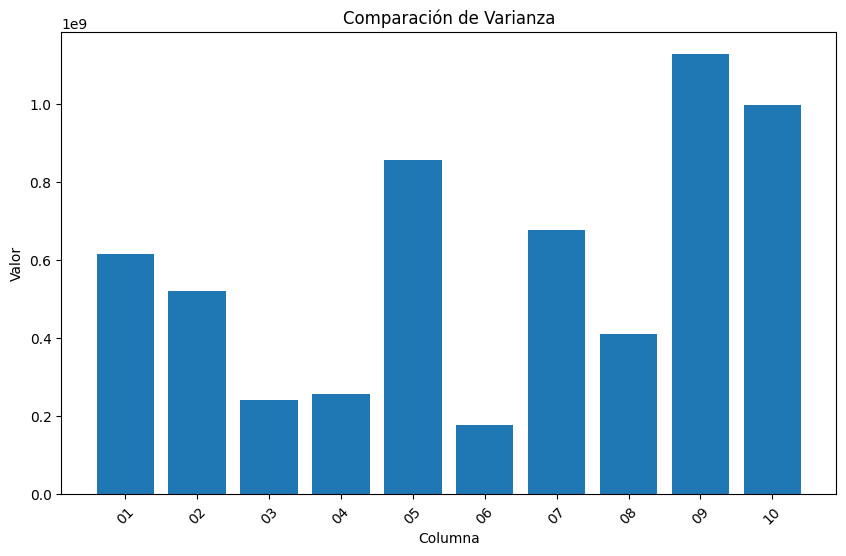

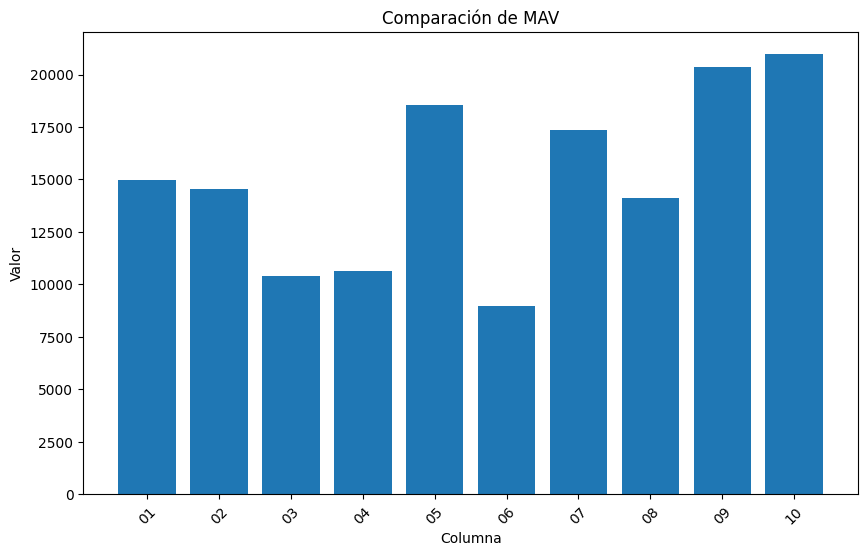

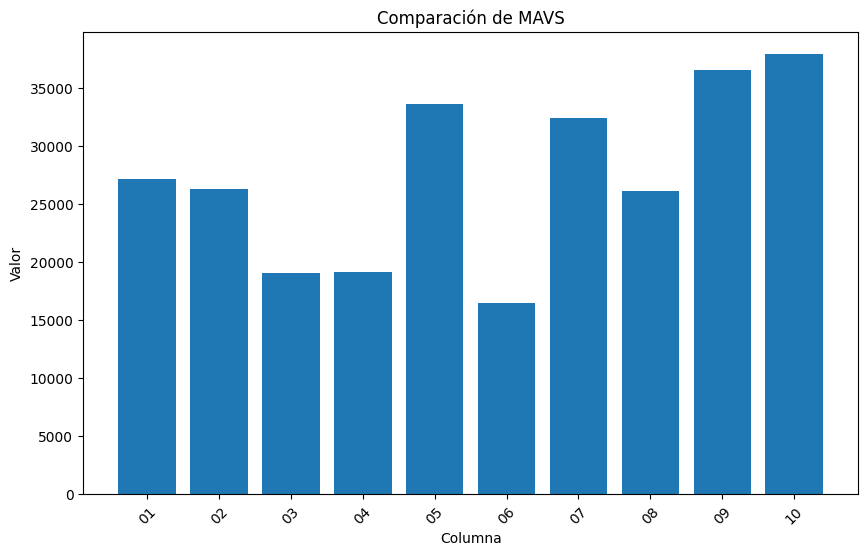

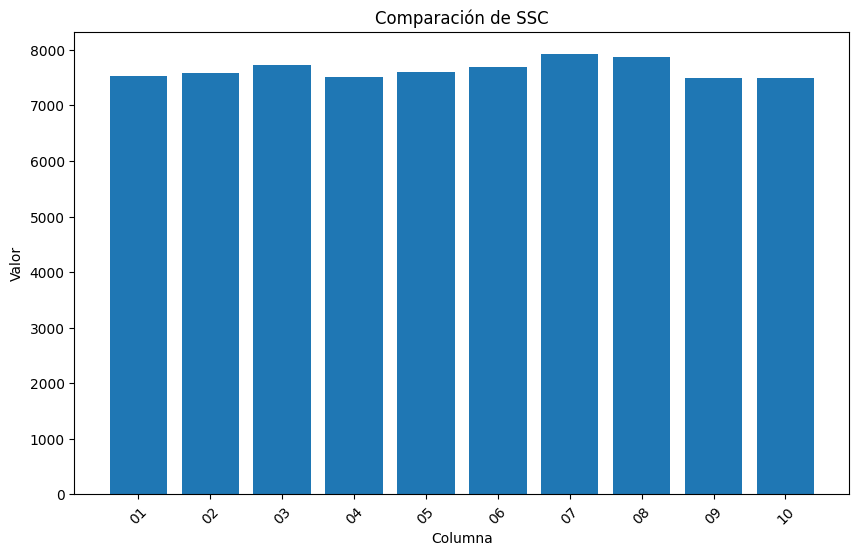

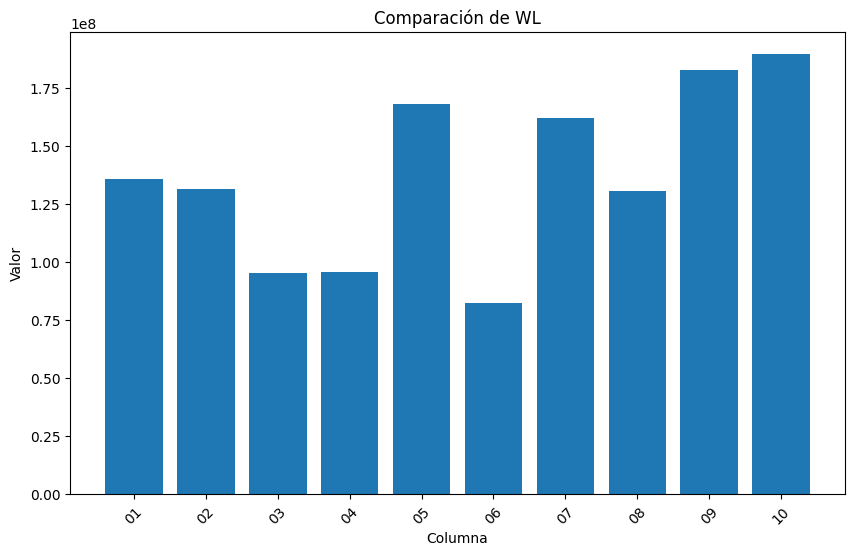

In [ ]:
#RMS
plt.figure(figsize=(10, 6))
plt.bar(df_tkeo.columns, df_tkeo.apply(rms))
plt.title('Comparación de RMS')
plt.xlabel('Columna')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

#VARIANZA
plt.figure(figsize=(10, 6))
plt.bar(df_tkeo.columns, df_tkeo.apply(variance))
plt.title('Comparación de Varianza')
plt.xlabel('Columna')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

#MAV
plt.figure(figsize=(10, 6))
plt.bar(df_tkeo.columns, df_tkeo.apply(mav))
plt.title('Comparación de MAV')
plt.xlabel('Columna')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

#MAVS
plt.figure(figsize=(10, 6))
plt.bar(df_tkeo.columns, df_tkeo.apply(mavs))
plt.title('Comparación de MAVS')
plt.xlabel('Columna')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

#SSC
plt.figure(figsize=(10, 6))
plt.bar(df_tkeo.columns, df_tkeo.apply(ssc))
plt.title('Comparación de SSC')
plt.xlabel('Columna')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()

#WL
plt.figure(figsize=(10, 6))
plt.bar(df_tkeo.columns, df_tkeo.apply(wl))
plt.title('Comparación de WL')
plt.xlabel('Columna')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.show()


**RMS:** En la gráfica 1 se puede observar el valor calculado de RMS para cada sujeto, el RMS es la raíz cuadrada del promedio de los cuadrados de los valores de la señal, esto indica la magnitud o amplitud general de la señal en cada sujeto.

Cada barra representa el valor RMS calculado por sujeto, podemos observar que la amplitud general de la señal varia entre sujetos, esto se da cuando más fibras musculares se activan y contraen simultáneamente, se produce una mayor actividad eléctrica que se manifiesta como una mayor amplitud en la señal de electromiografía. En el caso de las señales se observa que el sujeto 10 tiene una mayor amplitud en la señal, por lo tanto se puede concluir que tuvo una mayor actividad muscular.

**VARIANZA:** La varianza se calcula sumando los cuadrados de las desviaciones de cada valor respecto a la media, y luego dividiendo por el número total de observaciones. Es usada para caracterizar la dispersión de un conjunto de datos.

En el caso del sujeto 10 se observo una mayor dispersión de datos esto puede ser debido a que entre la contracción y relajación del músculo en estudio se hicieron cambios en la fuerza que este ejercio, mostrando asi la mayor variabilidad de los potenciales de acción de las fibras musculares del triceps en los movimientos del protocolo respecto a otros sujetos.

**MAV:** La gráfica muestra el Valor Medio Absoluto calculados para el músculo triceps en los 10 sujetos de estudio, el MAV proporciona el valor promedio de las magnitudes de las muestras de la señal, sin tener en cuenta sus signos.

Esta gráfica es un promedio de la grafica de RMS por lo que se espera que el comportamiento sea parecido a esta, por lo tanto se puede considerar que un mayor número de MAV corresponde a una mayor actividad muscular en el triceps.

**MAVS:** La gráfica de MAVS e puede observar información sobre la velocidad de cambio del promedio de las magnitudes de las muestras de la señal electromiográfica, en este caso para un músculo especifico, en los sujetos donde hay mayor valor de MAVS significa que es una variación rápida en la señal, se podria considerar que son movimientos abruptos, el pico más alto de esta gráfica esta en el sujeto 10, por lo anteriormente concluido en las otras gráficas, su comportamiento en esta es el esperado.

**SSC:** El parámetro SSC mide el cambio en las pendientes de la señal, por lo que se puede observar la variabilidad y la complejidad de la señal en el músculo triceps.

En la gráfica podemos observar que los picos estan todos por el mismo valor, esto puede deberse a que los movimientos en los 10 sujetos siguen un protocolo exacto, haciendo que la variabilidad en la señal sea parecido en todos, sin embargo difiere un poco debido a que los potenciales de acción de los músculos pueden ser diferentes en cada sujeto.

**WL:** El WL habla de la duración total de la actividad múscular en el caso de la EMG, los valores más altos en la gráfica representan los sujetos que realizaron el protocolo en mayor duración, esto se debe a que las personas realizaron el movimiento más rápido o lento que otras personas, en este caso, la variabilidad en los valores de esta gráfica se puede sar porque no se estipulo un tiempo exacto para cda ejercicio, sino, solo se dio un tiempo para los intervalos de 3 segundos.

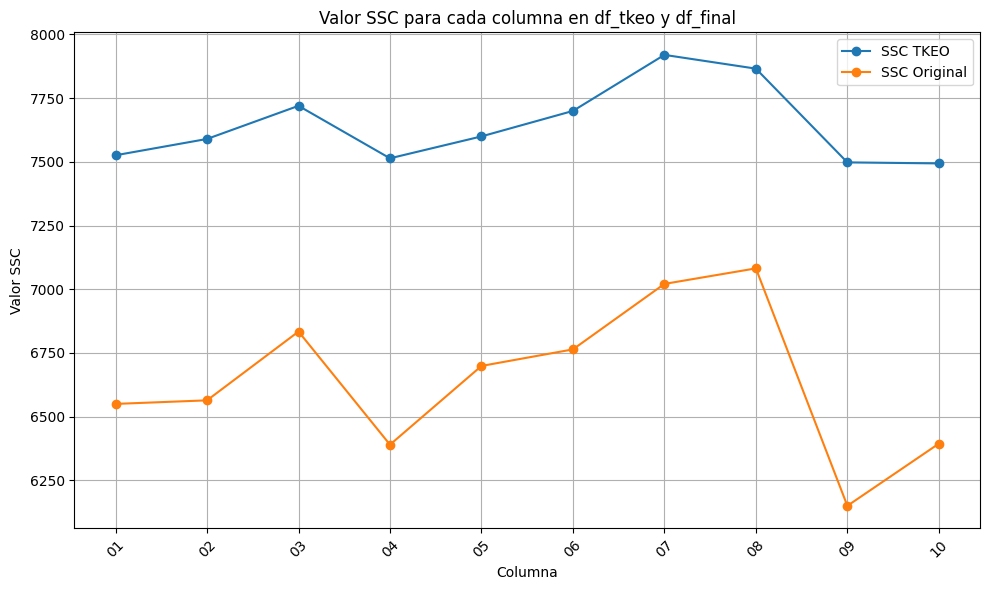

In [ ]:
ssc_values_tkeo = df_tkeo.apply(ssc).tolist()
ssc_values_final = df_final.apply(ssc).tolist()

plt.figure(figsize=(10, 6))

plt.plot(df_tkeo.columns, ssc_values_tkeo, marker='o', linestyle='-', label='SSC TKEO')
plt.plot(df_final.columns, ssc_values_final, marker='o', linestyle='-', label='SSC Original')

plt.title('Valor SSC para cada columna en df_tkeo y df_final')
plt.xlabel('Columna')
plt.ylabel('Valor SSC')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()




El parámetro SSC mide el cambio en las pendientes de la señal, por lo que se puede observar la variabilidad y la complejidad de la señal en el músculo triceps, la SSC en los EMG nos permite ver si hay cambio en la actividad muscular ya que esta análiza los cambios de dirección de la señal, permitiendonos ver el cambio entre contracciones y relajación, cuando vemos un aumento en el SSC significa que hay cambios en el músculo más frecuentes.

comparando la señal original (naranjada) con la señal TKEO(azul), se puede observar menor variabilidad entre los valores, esta variabilidad se puede dar que entre los sujetos no se contó el tiempo exacto de cada movimiento, si no que se tomodo solamente el tiempo de descanso de 3 segundos, sin embargo, se puede observar un aumento en los valores de la señal con TKEO, que nos indica que hubo un aumento al aplicarle esta operación.



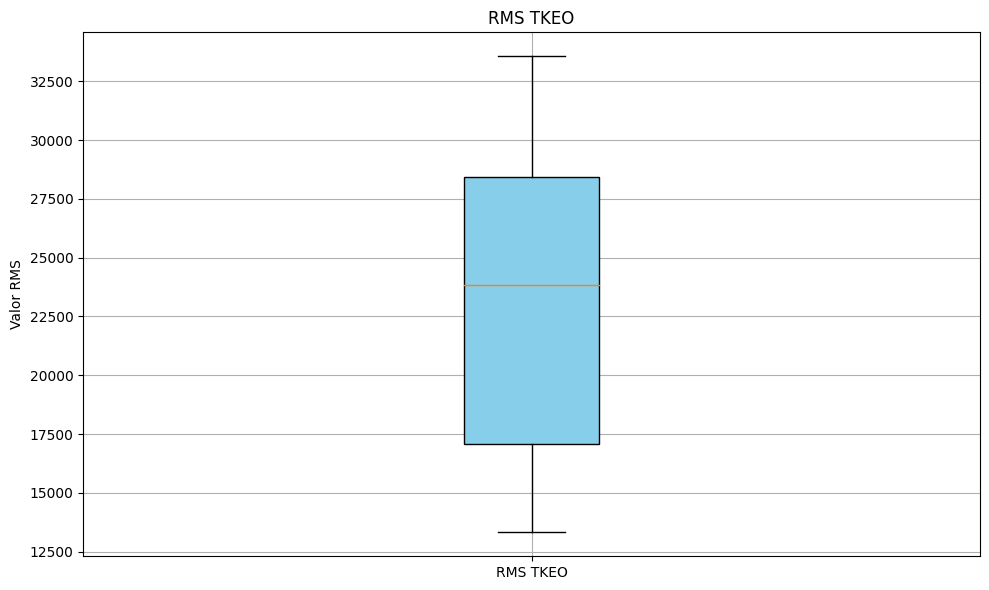

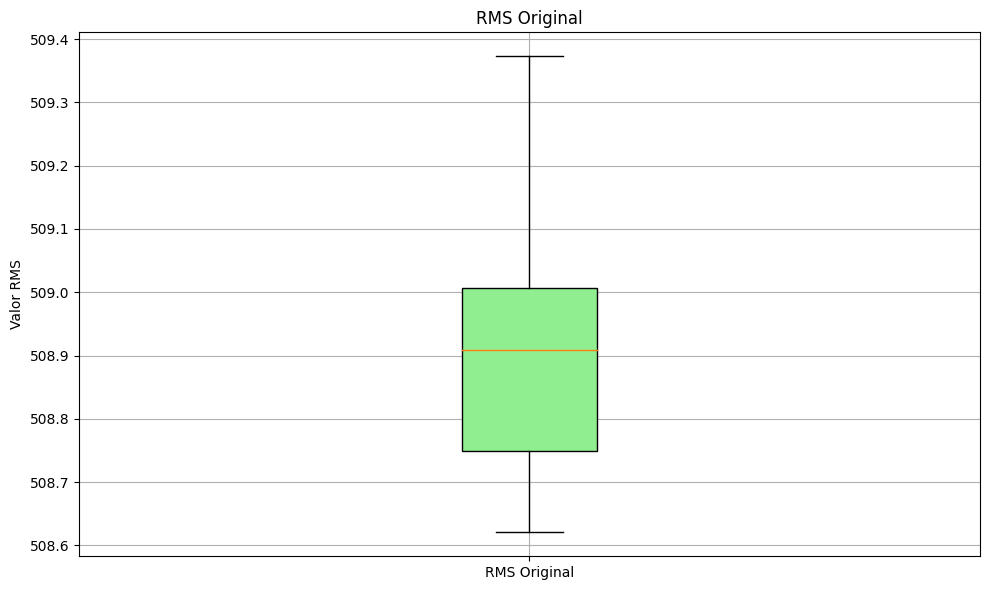

Mediana de RMS TKEO: 23822.264222025133
Media de RMS TKEO: 23318.18256245429
Mediana de RMS Original: 508.9093027607009
Media de RMS Original: 508.90834316756144


In [ ]:

plt.figure(figsize=(10, 6))
plt.boxplot(df_tkeo.apply(rms), positions=[0], labels=['RMS TKEO'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('RMS TKEO')
plt.ylabel('Valor RMS')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.boxplot(df_final.apply(rms), positions=[0], labels=['RMS Original'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('RMS Original')
plt.ylabel('Valor RMS')
plt.grid(True)
plt.tight_layout()
plt.show()

mediana = df_tkeo.apply(rms).median()
media = df_tkeo.apply(rms).mean()
print("Mediana de RMS TKEO:", mediana)
print("Media de RMS TKEO:", media)

mediana1 = df_final.apply(rms).median()
media1 = df_final.apply(rms).mean()
print("Mediana de RMS Original:", mediana1)
print("Media de RMS Original:", media1)

En el caso del RMS, se mide la amplitud de la señal, un valor de RMS más alto indica que hay mayor amplitud en la señal, por lo tanto se observa como se comporta la amplitud en el caso de la original y en el caso de la señal a la que se le aplico el operador TKEO, la caja en el diagrama de caja y bigotes representa la dispersión de los datos, es decir la variabilidad de la amplitud en los 10 sujetos de estudio. Se puede observar que la mediana de la señal con RMS es de 23.822, mientras que la de la señal original es de 508.9. Esta diferencia es significativa entre ambas. Además se puede observar que la amplitud aumenta en la TKEO.

En cuanto a la distribución, se nota que la línea media en el caso de la señal con TKEO está ligeramente desplazada hacia la derecha, lo que indica una distribución con una tendencia hacia la izquierda mínima. Por otro lado, la señal original tiene la línea media bastante desplazada hacia la derecha, lo que indica una distribución hacia la izquierda más pronunciada.

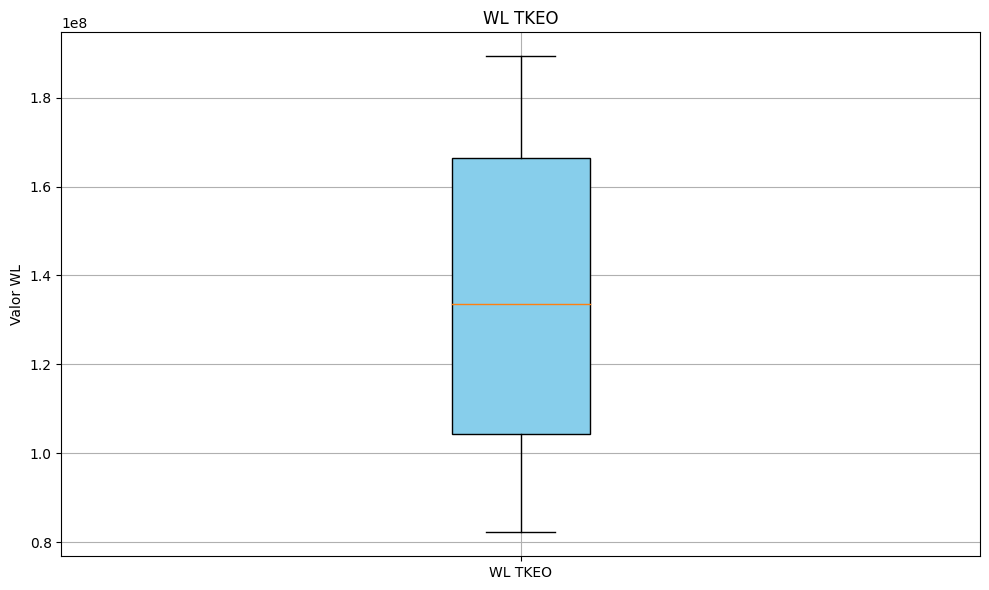

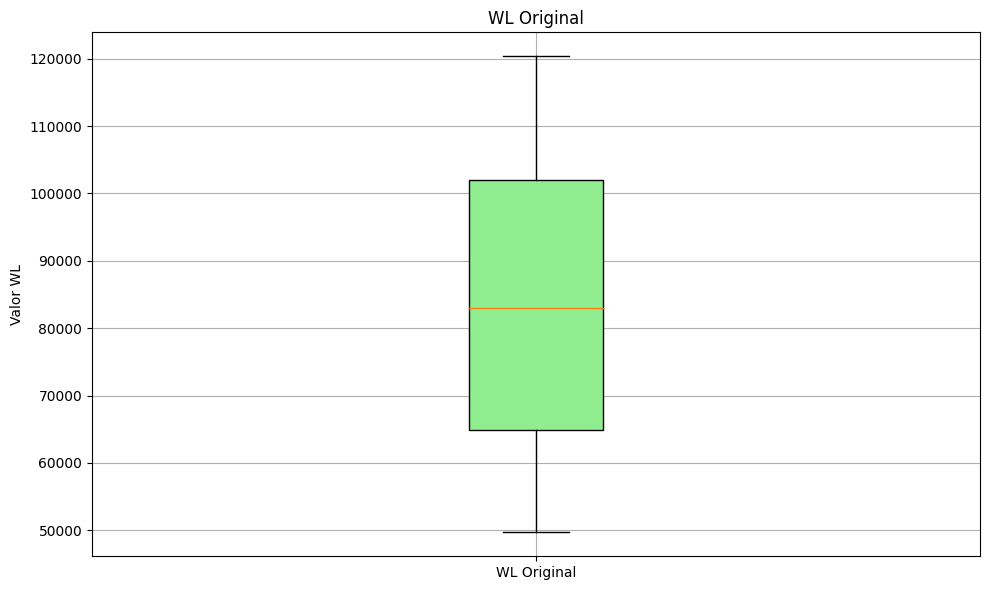

Mediana de WL TKEO: 133517859.5
Media de WL TKEO: 137271331.1
Mediana de WL Original: 82951.0
Media de WL Original: 84949.1


In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(df_tkeo.apply(wl), positions=[0], labels=['WL TKEO'], patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('WL TKEO')
plt.ylabel('Valor WL')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.boxplot(df_final.apply(wl), positions=[0], labels=['WL Original'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title('WL Original')
plt.ylabel('Valor WL')
plt.grid(True)
plt.tight_layout()
plt.show()

mediana = df_tkeo.apply(wl).median()
media = df_tkeo.apply(wl).mean()
print("Mediana de WL TKEO:", mediana)
print("Media de WL TKEO:", media)

mediana1 = df_final.apply(wl).median()
media1 = df_final.apply(wl).mean()
print("Mediana de WL Original:", mediana1)
print("Media de WL Original:", media1)

La métrica Wl mide la duración total de la actividad múscular en el caso de la EMG, en este caso al aplicar el WL consideramos tanto la amplitud como la frecuencia en los cambios de la señal en los 10 sujetos de estudio.

En el diagrama de cajas y bigotes se puede observar la distribución de los datos tanto para la señal original como la que tiene TKEO, lo cual nos permite analizar la disperción que hay entre los movimientos de cada sujeto, al realizar el protocolo, si se hizo más lento o más rápido.

Se puede ver que hay una línea media en la señal original en el 82951, que se encuentra en el medio de la caja, lo que indica que se tiene una distribución normal para estos datos, por otro lado para la señal con TKEO se tiene una linea media en 133517.86, que se encuentra un poco hacia la izquierda, lo que indica una distribución sesgada hacia la derecha, pero muy minima. Se puede observar un aumento en los valores de la señal tkeo respecto a la original.

In [ ]:
alpha = 0.05

shapiro_results = []

for sujeto in range(1, 11):
    shapiro_original = shapiro(df_final[f'{sujeto:02d}'])
    p_value_original = shapiro_original[1]
    normal_original = p_value_original > alpha

    shapiro_tkeo = shapiro(df_tkeo[f'{sujeto:02d}'])

    p_value_tkeo = shapiro_tkeo[1]

    normal_tkeo = p_value_tkeo > alpha

    shapiro_results.append({
        'Sujeto': f'Sujeto {sujeto}',
        'Shapiro-Wilk Original': (shapiro_original[0], p_value_original),
        'Shapiro-Wilk TKEO': (shapiro_tkeo[0], p_value_tkeo),
        'Normal Original': normal_original,
        'Normal TKEO': normal_tkeo
    })

shapiro_results_df = pd.DataFrame(shapiro_results)

display(shapiro_results_df)

,Sujeto,Shapiro-Wilk Original,Shapiro-Wilk TKEO,Normal Original,Normal TKEO
0,Sujeto 1,"(0.8973629474639893, 0.0)","(0.8397352695465088, 0.0)",False,False
1,Sujeto 2,"(0.941339910030365, 1.170518620235163e-40)","(0.8847854137420654, 0.0)",False,False
2,Sujeto 3,"(0.9676046967506409, 3.9163184153753995e-32)","(0.8845428824424744, 0.0)",False,False
3,Sujeto 4,"(0.9263455271720886, 3.363116314379561e-44)","(0.8862820267677307, 0.0)",False,False
4,Sujeto 5,"(0.9240787625312805, 1.1210387714598537e-44)","(0.8888648152351379, 0.0)",False,False
5,Sujeto 6,"(0.9858151078224182, 5.124415196766726e-22)","(0.868016242980957, 0.0)",False,False
6,Sujeto 7,"(0.9705216288566589, 7.098193485180483e-31)","(0.9233981370925903, 8.407790785948902e-45)",False,False
7,Sujeto 8,"(0.9815521240234375, 5.127566301652631e-25)","(0.9246896505355835, 1.5414283107572988e-44)",False,False
8,Sujeto 9,"(0.9235020279884338, 8.407790785948902e-45)","(0.8561893701553345, 0.0)",False,False
9,Sujeto 10,"(0.9433667659759521, 4.003271491837067e-40)","(0.9178365468978882, 0.0)",False,False


In [ ]:
levene_results = []

for sujeto in range(1, 11):

    rms_original = df_final[f'{sujeto:02d}']
    rms_tkeo = df_tkeo[f'{sujeto:02d}']
    levene_result = levene(rms_original, rms_tkeo)

    if levene_result.pvalue < 0.05:
        diferencia_significativa = "Hay diferencia significativa"
    else:
        diferencia_significativa = "No hay diferencia significativa"

    levene_results.append({
        'Sujeto': f'Sujeto {sujeto}',
        'Diferencia significativa en varianzas': diferencia_significativa
    })

levene_results_df = pd.DataFrame(levene_results)

print("Prueba de Levene para comparar la varianza del RMS entre la señal original y la señal con TKEO por sujeto:")
display(levene_results_df)

Prueba de Levene para comparar la varianza del RMS entre la señal original y la señal con TKEO por sujeto:


,Sujeto,Diferencia significativa en varianzas
0,Sujeto 1,Hay diferencia significativa
1,Sujeto 2,Hay diferencia significativa
2,Sujeto 3,Hay diferencia significativa
3,Sujeto 4,Hay diferencia significativa
4,Sujeto 5,Hay diferencia significativa
5,Sujeto 6,Hay diferencia significativa
6,Sujeto 7,Hay diferencia significativa
7,Sujeto 8,Hay diferencia significativa
8,Sujeto 9,Hay diferencia significativa
9,Sujeto 10,Hay diferencia significativa


In [ ]:
mannwhitneyu_results = []
for sujeto in range(1, 11):
    rms_original = df_final[f'{sujeto:02d}']
    rms_tkeo = df_tkeo[f'{sujeto:02d}']
    mannwhitneyu_result = mannwhitneyu(rms_original, rms_tkeo)
    estadistico_u = mannwhitneyu_result.statistic
    p_valor = mannwhitneyu_result.pvalue
    diferencia_significativa = "Sí" if p_valor < 0.05 else "No"

    mannwhitneyu_results.append({
        'Sujeto': f'Sujeto {sujeto}',
        'Estadístico de Mann-Whitney U': estadistico_u,
        'P-valor': f"{p_valor:.2e}",
        'Diferencia significativa': diferencia_significativa
    })

mannwhitneyu_results_df = pd.DataFrame(mannwhitneyu_results)

print("Resultados de la prueba de Mann-Whitney U para comparar los RMS entre la señal original y la señal con TKEO por sujeto:")
display(mannwhitneyu_results_df)

Resultados de la prueba de Mann-Whitney U para comparar los RMS entre la señal original y la señal con TKEO por sujeto:


,Sujeto,Estadístico de Mann-Whitney U,P-valor,Diferencia significativa
0,Sujeto 1,12971691.5,1.08e-03,Sí
1,Sujeto 2,13153179.5,6.03e-06,Sí
2,Sujeto 3,12879498.5,8.56e-03,Sí
3,Sujeto 4,13106466.0,2.65e-05,Sí
4,Sujeto 5,13145330.0,7.79e-06,Sí
5,Sujeto 6,12880325.5,8.42e-03,Sí
6,Sujeto 7,13042775.0,1.70e-04,Sí
7,Sujeto 8,12901409.5,5.42e-03,Sí
8,Sujeto 9,13116125.0,1.97e-05,Sí
9,Sujeto 10,13184861.5,2.09e-06,Sí


Se realizá la prueba de Shapiro para determinar la normalidad de las señales de cada uno de los 10 sujetos, en donde la H0 dice que los datos no siguen una distribución normal, por su parte la H1 sugiere que los datos no se presentan con una distribución normal, en este caso las pruebas de cada uno de los sujetos presentaron un resultado menor que el nivel de significancia, tomado en 0.05, lo que nos indica que se rechaza la hipotesis nula, es decir los datos no tienen una distribución normal, esto puede darse debido a artefactos que afectan la toma de la señal, como lo son los dispositivos tecnologicos de alrededor que pudieron causar ruido, asi como el ambiente en el que se realizo la prueba, hasta factores fisiologicos, entre otras cosas. Por lo tanto no se da de forma balanceada.
**con esta prueba comprobamos que no se puede hacer una prueba paramétrica, y se opta por una prueba no paramétrica**

Ahora se analiza la prueba Leavene que se utiliza para evaluar si las varianzas de dos o más grupos de datos son iguales, para esto se toma el mismo nivel de significancia del anterior (0.05) y se realiza la misma comparación si el valor Si el valor p es mayor que el nivel de significancia establecido, entonces no se rechaza la hipótesis nula de igualdad de varianzas. Las hipotesis de estas pruebas son hipótesis nula (H0) donde se dice que las varianzas de los grupos son iguales (homogeneidad de varianzas), y en la hipótesis alternativa (Ha) Al menos una varianza de los grupos es diferente (heterogeneidad de varianzas). Para el caso de nuestros datos se toma la hipótesis nula, diciendo que hay una varianza importante en los datos analizados.

La prueba Mann-Whitney se utiliza para comparar muestras independientes que no distribuyen de forma normal, y determina si una muestra tiene valores significativamente diferentes, para realizar este analisis se calcula el valor de p por medio de la función mannwhitneyu, y se compara con el nivel de significancia (0.05), si el valor p es menor entonces se rechaza la hipotesis nula (no hay diferencia significativa), y se sugiere que si hay una diferencia significativa, en el caso de este análisis para el EMG tomado.

En cuanto a la independecia, se toma la señal de 10 sujetos por separado, por lo cual cada prueba cumple con esto.



CONCLUSIÓN PRUEBAS PARAMÉTRICA: Con base en el análisis de nuestras pruebas paramétricas, se concluye que nuestros datos no siguen una distribución normal, lo que impide la aplicación de métodos paramétricos como la prueba t de Student, que requiere una distribución normal de los datos. Sin embargo, podemos recurrir a pruebas no paramétricas como la prueba de Mann-Whitney, que no depende de la normalidad de los datos y es adecuada para comparar dos muestras independientes, como en nuestro caso.

Es importante destacar la notable diferencia entre la señal original y la señal procesada con la técnica de Teager-Kaiser Energy Operator (TKEO). Esta diferencia puede atribuirse a diversos factores, como la calidad de la señal adquirida y la presencia de artefactos durante la toma de la prueba.

Además, al realizar pruebas descriptivas, se observa una alta dispersión o variabilidad en muchos casos, lo cual sugiere la presencia de ruido en los datos. Este ruido puede deberse a varios factores, como la variabilidad en los dispositivos utilizados para la adquisición de la señal, el protocolo empleado durante la prueba, así como la presencia de artefactos durante la toma de la señal.